In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Embedding
from keras.utils.vis_utils import plot_model



## Reading Dataset

In [107]:
bbc_data = pd.read_csv('/content/drive/My Drive/Text Classification/bbc-text.csv')

In [108]:
bbc_data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [109]:
bbc_data.shape

(2225, 2)

## Dropping duplicate rows

In [110]:
bbc_data.drop_duplicates(inplace=True)

## Visualization of Category column

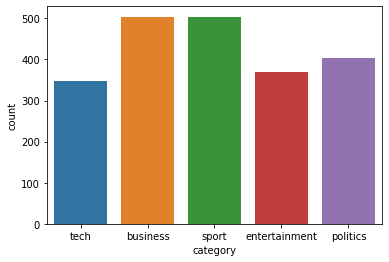

In [111]:
sns.countplot(bbc_data['category'])

## New column

In [112]:
# your don't need this work if you use LabelEncoder
category_dict = {'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4}
bbc_data['category_number'] = bbc_data['category'].map(category_dict)
bbc_data.head(5)

,category,text,category_number
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3


## Dividing dataset

In [113]:
train_size = int(len(bbc_data) * .8)
test_size = len(bbc_data)-train_size

def divide_dataset(data, size):
  train = data[:size]
  test = data[size:]
  return train, test

train_category, test_category = divide_dataset(bbc_data['category'], train_size)
train_text, test_text = divide_dataset(bbc_data['text'], train_size)


## Tokenizing 

In [114]:
max_words = 1000
tokenizer = Tokenizer(num_words=max_words,
                      char_level=False)
tokenizer.fit_on_texts(train_text)

x_train = tokenizer.texts_to_matrix(train_text)
x_test = tokenizer.texts_to_matrix(test_text)


## Encoder of category column

In [115]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_category)
y_test = encoder.fit_transform(test_category)


## One-Hot-Encoding of label data

In [116]:
num_classes = np.max(y_train) + 1

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Checking Shape

In [117]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1700, 1000)
(426, 1000)
(1700, 5)
(426, 5)


## Model

In [118]:
model = Sequential()
model.add(Dense(500, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))


In [119]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 500)               500500    
_________________________________________________________________
activation_4 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 2505      
Total params: 503,005
Trainable params: 503,005
Non-trainable params: 0
_________________________________________________________________


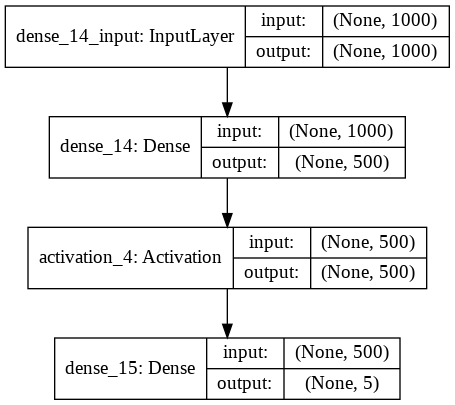

In [120]:
#plotting model
plot_model(model, show_shapes=True, to_file= 'multichannel.png')


In [121]:
# compile
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


## Model Fit

In [122]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Train on 1530 samples, validate on 170 samples
Epoch 1/10
1530/1530 [==============================] - 0s 215us/step - loss: 0.1591 - accuracy: 0.9426 - val_loss: 0.0692 - val_accuracy: 0.9729
Epoch 2/10
1530/1530 [==============================] - 0s 142us/step - loss: 0.0191 - accuracy: 0.9954 - val_loss: 0.0550 - val_accuracy: 0.9776
Epoch 3/10
1530/1530 [==============================] - 0s 143us/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 0.0534 - val_accuracy: 0.9753
Epoch 4/10
1530/1530 [==============================] - 0s 143us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 0.9765
Epoch 5/10
1530/1530 [==============================] - 0s 147us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9776
Epoch 6/10
1530/1530 [==============================] - 0s 140us/step - loss: 9.5543e-04 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9776
Epoch 7/10
1530/1530 [==============================] - 0s 141us/step - l

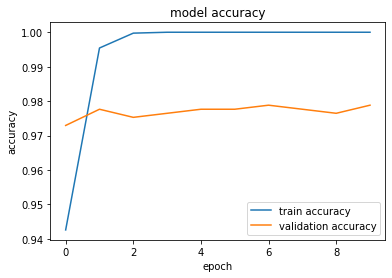

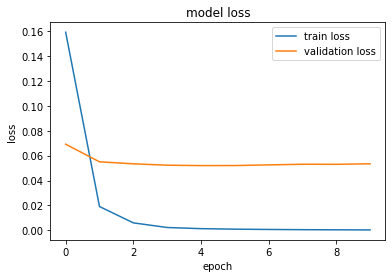

In [125]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='best')
plt.show()

## Evaluate Model

In [126]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=32, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


426/426 [==============================] - 0s 77us/step
Test loss: 0.046722061127564156
Test accuracy: 0.9812206625938416


## Some Prediction

In [127]:
text_labels = encoder.classes_
text_labels

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [128]:
for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Actual label:' + test_category.iloc[i])
    print("Predicted label: " + predicted_label + "\n")  


mourinho to escape fa charge chelsea boss jose mou ...
Actual label:sport
Predicted label: sport

nintendo ds aims to touch gamers the mobile gaming ...
Actual label:tech
Predicted label: tech

vickery upbeat about arm injury england prop phil  ...
Actual label:sport
Predicted label: sport

china  to overtake us net use  the chinese net-usi ...
Actual label:tech
Predicted label: tech

downing injury mars uefa victory middlesbrough bos ...
Actual label:sport
Predicted label: sport

curbishley delight for johansson charlton manager  ...
Actual label:sport
Predicted label: sport

eu ministers to mull jet fuel tax european union f ...
Actual label:business
Predicted label: business

astrazeneca hit by drug failure shares in anglo-sw ...
Actual label:business
Predicted label: business

apple laptop is  greatest gadget  the apple powerb ...
Actual label:tech
Predicted label: tech

athens memories soar above lows well  it s goodbye ...
Actual label:sport
Predicted label: sport

